##  Frechet LeNet Distance (FLD) for Binary-MNIST


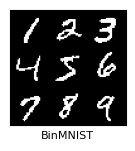

In [1]:
import torch
import numpy as np
from models import LeNet5, CNN
from utils import plot_combined_with_mnist_grid
from dataset import load_nist_data, get_test_samples
from fcd import fld_NIST
import  torch.nn as nn

device = 'cuda:0'
lenet = CNN(init_filters=32, dim_hidden=(256, 128), dropout=(0.25, 0.1), num_classes=10) 
lenet.load_state_dict(torch.load('models/CNN_v2_MNIST.pth'))
lenet.eval()

#...Load MNIST reference dataset

digits = get_test_samples(name='BinMNIST',  plot=True)

## Frechet LeNet Distance (FLD) on bineraized MNIST

Below we compute the FLD metric for various image corruption levels of the binarized MNIST dataset.
For the classifier we used a pre-trained LeNet-5 architecture. Results below show that the FLD computed from 
features out of the last layer (third layer) has a better separation power accross all considered deformation. 

### 1. Gaussian noise

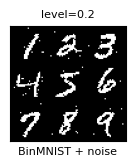

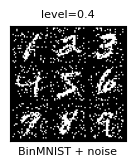

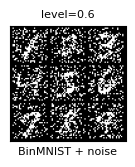

In [3]:
corruption = 'noise'

noise_level_1 = 0.2
noise_level_2 = 0.4
noise_level_3 = 0.6

digits_noise_1 = get_test_samples(name='BinMNIST', corruption=corruption, level=noise_level_1, plot=True)
digits_noise_2 = get_test_samples(name='BinMNIST', corruption=corruption, level=noise_level_2, plot=True)
digits_noise_3 = get_test_samples(name='BinMNIST', corruption=corruption, level=noise_level_3, plot=True)


In [4]:
fcd_1_noise = fld_NIST(model=lenet, name='BinMNIST', corruption=corruption, values=np.arange(0.0, 0.6, 0.03), activation_layer='fc1', device=device)
fcd_2_noise  = fld_NIST(model=lenet, name='BinMNIST', corruption=corruption, values=np.arange(0.0, 0.6, 0.03), activation_layer='fc2', device=device)
fcd_3_noise  = fld_NIST(model=lenet, name='BinMNIST', corruption=corruption, values=np.arange(0.0, 0.6, 0.03), activation_layer='fc3', device=device)


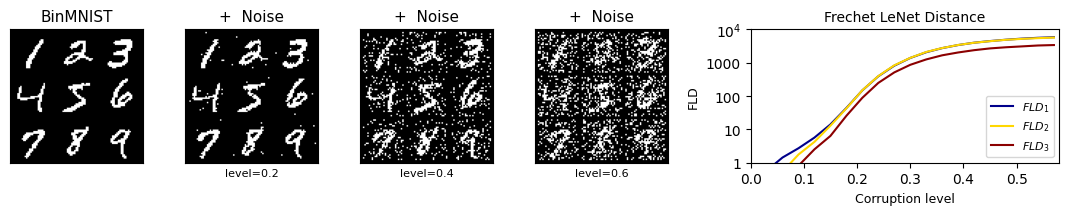

In [15]:
plot_combined_with_mnist_grid(samples=[digits, digits_noise_1, digits_noise_2, digits_noise_3], 
                              fcd=[fcd_1_noise, fcd_2_noise, fcd_3_noise], 
                              distortion='Noise', 
                              name='BinMNIST',
                              dist_levels=['', r'level={}'.format(noise_level_1), r'level={}'.format(noise_level_2), r'level={}'.format(noise_level_3)],
                              xlim=(0, 0.58),
                              ylim=(1, 3000),
                              log=True,loc='lower right',
                              figsize=(11,2.25))

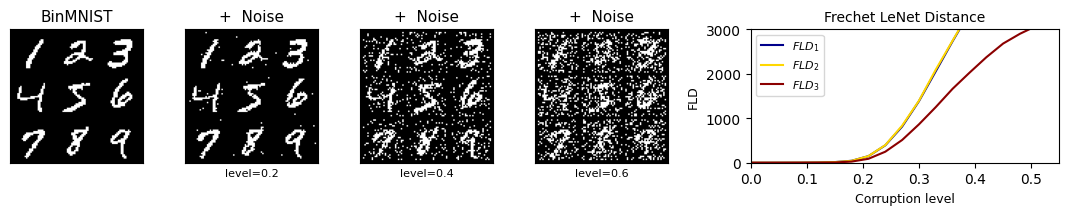

In [17]:
plot_combined_with_mnist_grid(samples=[digits, digits_noise_1, digits_noise_2, digits_noise_3], 
                              fcd=[fcd_1_noise, fcd_2_noise, fcd_3_noise], 
                              distortion='Noise', 
                              name='BinMNIST',
                              dist_levels=['', r'level={}'.format(noise_level_1), r'level={}'.format(noise_level_2), r'level={}'.format(noise_level_3)],
                              xlim=(0, 0.55),
                              ylim=(0, 3000),
                              figsize=(11,2.25))

### 2. blackout

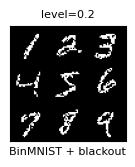

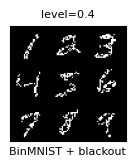

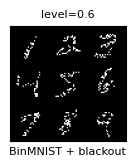

In [7]:
corruption = 'blackout'

black_level_1 = 0.2
black_level_2 = 0.4
black_level_3 = 0.6

digits_blackout_1 = get_test_samples(name='BinMNIST', corruption=corruption, level=black_level_1, plot=True)
digits_blackout_2 = get_test_samples(name='BinMNIST', corruption=corruption, level=black_level_2, plot=True)
digits_blackout_3 = get_test_samples(name='BinMNIST', corruption=corruption, level=black_level_3, plot=True)

In [8]:
fcd_1_black = fld_NIST(model=lenet, name='MNIST', corruption=corruption, values=np.arange(0.0, 0.7, 0.02), activation_layer='fc1', device=device)
fcd_2_black = fld_NIST(model=lenet, name='MNIST', corruption=corruption, values=np.arange(0.0, 0.7, 0.02), activation_layer='fc2', device=device)
fcd_3_black = fld_NIST(model=lenet, name='MNIST', corruption=corruption, values=np.arange(0.0, 0.7, 0.02), activation_layer='fc3', device=device)

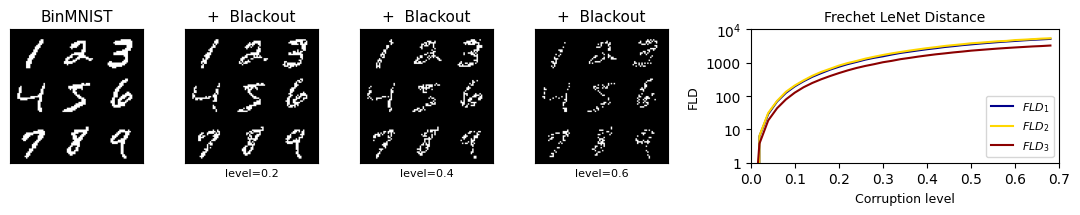

In [18]:
plot_combined_with_mnist_grid(samples=[digits, digits_blackout_1, digits_blackout_2, digits_blackout_3], 
                              fcd=[fcd_1_black, fcd_2_black, fcd_3_black], 
                              distortion='Blackout', 
                              name='BinMNIST',
                              dist_levels=['', r'level={}'.format(black_level_1), r'level={}'.format(black_level_2), r'level={}'.format(black_level_3)],
                              xlim=(0, 0.7),
                              ylim=(0, 10000),
                              log=True, loc='lower right',
                              figsize=(11,2.25))

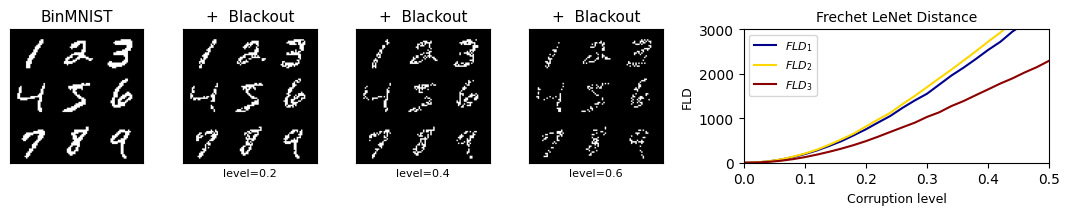

In [19]:
plot_combined_with_mnist_grid(samples=[digits, digits_blackout_1, digits_blackout_2, digits_blackout_3], 
                              fcd=[fcd_1_black, fcd_2_black, fcd_3_black], 
                              distortion='Blackout', 
                              name='BinMNIST',
                              dist_levels=['', r'level={}'.format(black_level_1), r'level={}'.format(black_level_2), r'level={}'.format(black_level_3)],
                              xlim=(0, 0.5),
                              ylim=(0, 3000),
                              figsize=(11,2.25))

### 2. Gaussian blur

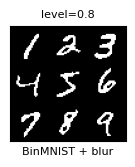

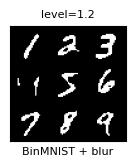

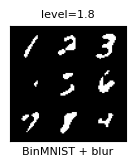

In [20]:
corruption = 'blur'

blur_level_1 = 0.8
blur_level_2 = 1.2
blur_level_3 = 1.8

digits_blur_1 = get_test_samples(name='BinMNIST', corruption=corruption, level=blur_level_1, plot=True)
digits_blur_2 = get_test_samples(name='BinMNIST', corruption=corruption, level=blur_level_2, plot=True)
digits_blur_3 = get_test_samples(name='BinMNIST', corruption=corruption, level=blur_level_3, plot=True)

In [21]:
fcd_1_blur = fld_NIST(model=lenet, name='BinMNIST', corruption=corruption, values=np.arange(0.001, 3, 0.1), activation_layer='fc1', device=device)
fcd_2_blur = fld_NIST(model=lenet, name='BinMNIST', corruption=corruption, values=np.arange(0.001, 3, 0.1), activation_layer='fc2', device=device)
fcd_3_blur = fld_NIST(model=lenet, name='BinMNIST', corruption=corruption, values=np.arange(0.001, 3, 0.1), activation_layer='fc3', device=device)

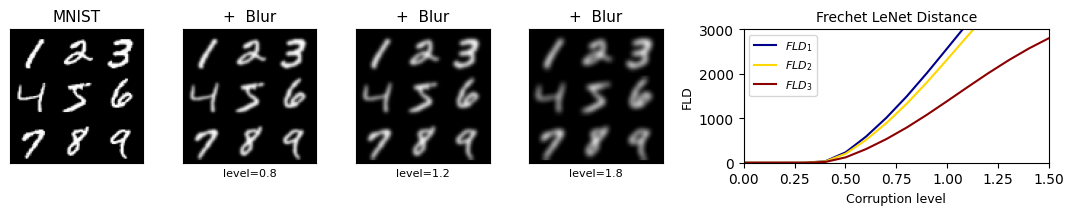

In [28]:
plot_combined_with_mnist_grid(samples=[digits, digits_blur_1, digits_blur_2, digits_blur_3], 
                              fcd=[fcd_1_blur, fcd_2_blur, fcd_3_blur], 
                              distortion='Blur', 
                              name='BinMNIST',
                              dist_levels=['', r'level={}'.format(blur_level_1), r'level={}'.format(blur_level_2), r'level={}'.format(blur_level_3)],
                              xlim=(0, 3),
                              ylim=(1, 3000),
                              log=True, loc='lower right',
                              figsize=(11,2.25))

In [ ]:
plot_combined_with_mnist_grid(samples=[digits, digits_blur_1, digits_blur_2, digits_blur_3], 
                              fcd=[fcd_1_blur, fcd_2_blur, fcd_3_blur], 
                              distortion='Blur', 
                              name='BinMNIST',
                              dist_levels=['', r'level={}'.format(blur_level_1), r'level={}'.format(blur_level_2), r'level={}'.format(blur_level_3)],
                              xlim=(0, 1.5),
                              ylim=(0, 3000),
                              figsize=(11,2.25))

### 3. Swirl deformation

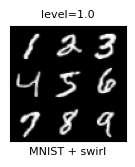

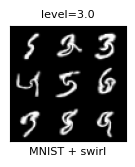

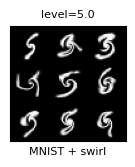

In [30]:
corruption = 'swirl'

swirl_level_1 = 1.0
swirl_level_2 = 3.0
swirl_level_3 = 5.0

digits_swirl_1 = get_test_samples(name='BinMNIST', corruption=corruption, level=swirl_level_1, plot=True)
digits_swirl_2 = get_test_samples(name='BinMNIST', corruption=corruption, level=swirl_level_2, plot=True)
digits_swirl_3 = get_test_samples(name='BinMNIST', corruption=corruption, level=swirl_level_3, plot=True)

In [31]:
fcd_1_swirl = fld_NIST(model=lenet, name='BinMNIST', corruption=corruption, values=np.arange(0, 6.0, 0.25), activation_layer='fc1', device=device)
fcd_2_swirl = fld_NIST(model=lenet, name='BinMNIST', corruption=corruption, values=np.arange(0, 6.0, 0.25), activation_layer='fc2', device=device)
fcd_3_swirl = fld_NIST(model=lenet, name='BinMNIST', corruption=corruption, values=np.arange(0, 6.0, 0.25), activation_layer='fc3', device=device)

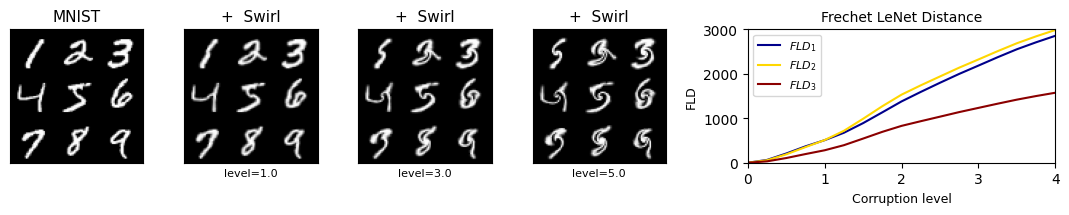

In [34]:
plot_combined_with_mnist_grid(samples=[digits, digits_swirl_1, digits_swirl_2, digits_swirl_3], 
                              fcd=[fcd_1_swirl, fcd_2_swirl, fcd_3_swirl], 
                              distortion='Swirl', 
                              name='BinMNIST',
                              dist_levels=['', r'level={}'.format(swirl_level_1), r'level={}'.format(swirl_level_2), r'level={}'.format(swirl_level_3)],
                              xlim=(0, 4.0),
                              ylim=(0, 3000),
                              figsize=(11,2.25))

### 4. Pixelization

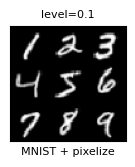

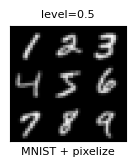

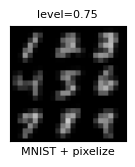

In [38]:
corruption = 'pixelize'

pix_level_1 = 0.1
pix_level_2 = 0.5
pix_level_3 = 0.75

digits_pix_1 = get_test_samples(name='BinMNIST', corruption=corruption, level=pix_level_1, plot=True)
digits_pix_2 = get_test_samples(name='BinMNIST', corruption=corruption, level=pix_level_2, plot=True)
digits_pix_3 = get_test_samples(name='BinMNIST', corruption=corruption, level=pix_level_3, plot=True)

In [36]:
fcd_1_pix = fld_NIST(model=lenet, name='BinMNIST', corruption=corruption, values=np.arange(0.0, .6, 0.02), activation_layer='fc1', device=device)
fcd_2_pix = fld_NIST(model=lenet, name='BinMNIST', corruption=corruption, values=np.arange(0.0, .6, 0.02), activation_layer='fc2', device=device)
fcd_3_pix = fld_NIST(model=lenet, name='BinMNIST', corruption=corruption, values=np.arange(0.0, .6, 0.02), activation_layer='fc3', device=device)

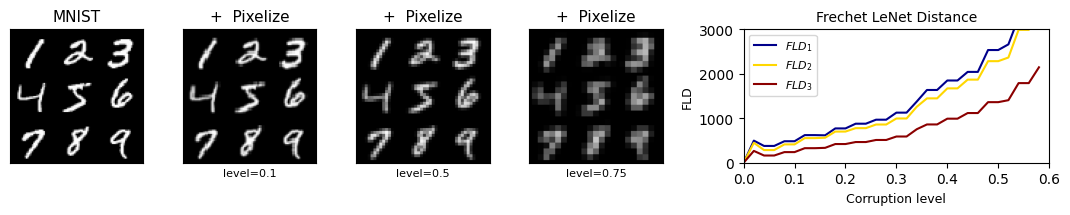

In [39]:
plot_combined_with_mnist_grid(samples=[digits, digits_pix_1, digits_pix_2, digits_pix_3], 
                              fcd=[fcd_1_pix, fcd_2_pix, fcd_3_pix], 
                              distortion='Pixelize', 
                              name='BinMNIST',
                              dist_levels=['', r'level={}'.format(pix_level_1), r'level={}'.format(pix_level_2), r'level={}'.format(pix_level_3)],
                              xlim=(0, 0.6),
                              ylim=(0, 3000),
                              figsize=(11,2.25))

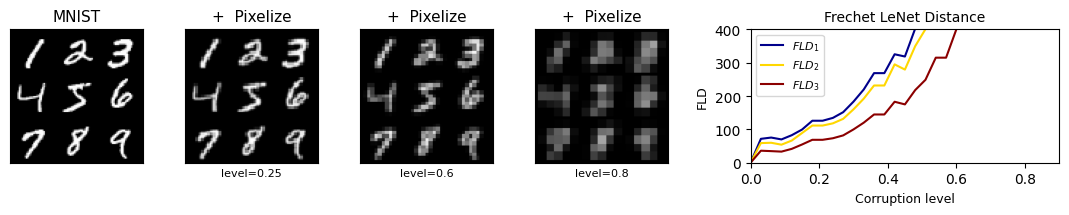

In [22]:
plot_combined_with_mnist_grid(samples=[digits, digits_pix_1, digits_pix_2, digits_pix_3], 
                              fcd=[fcd_1_pix, fcd_2_pix, fcd_3_pix], 
                              distortion='Pixelize', 
                              name='BinMNIST',
                              dist_levels=['', r'level={}'.format(pix_level_1), r'level={}'.format(pix_level_2), r'level={}'.format(pix_level_3)],
                              xlim=(0, 0.6),
                              ylim=(0, 3000),
                              figsize=(11,2.25))

### 6. Crop image

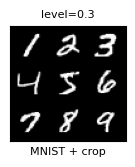

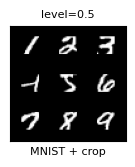

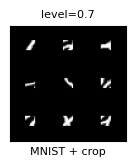

In [42]:
corruption = 'crop'

crop_level_1 = 0.3
crop_level_2 = 0.5
crop_level_3 = 0.7

digits_crop_1 = get_test_samples(name='BinMNIST', corruption=corruption, level=crop_level_1, plot=True)
digits_crop_2 = get_test_samples(name='BinMNIST', corruption=corruption, level=crop_level_2, plot=True)
digits_crop_3 = get_test_samples(name='BinMNIST', corruption=corruption, level=crop_level_3, plot=True)

In [43]:
fcd_1_crop = fld_NIST(model=lenet, name='BinMNIST', corruption=corruption, values=np.arange(0.0, 0.7, 0.02), activation_layer='fc1', device=device)
fcd_2_crop = fld_NIST(model=lenet, name='BinMNIST', corruption=corruption, values=np.arange(0.0, 0.7, 0.02), activation_layer='fc2', device=device)
fcd_3_crop = fld_NIST(model=lenet, name='BinMNIST', corruption=corruption, values=np.arange(0.0, 0.7, 0.02), activation_layer='fc3', device=device)

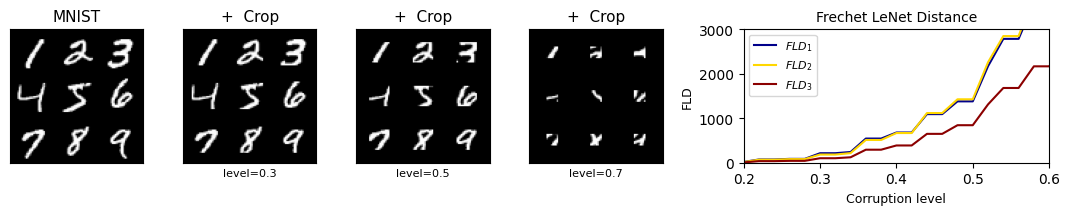

In [45]:
plot_combined_with_mnist_grid(samples=[digits, digits_crop_1, digits_crop_2, digits_crop_3], 
                              fcd=[fcd_1_crop, fcd_2_crop, fcd_3_crop], 
                              distortion='Crop', 
                              name='BinMNIST',
                              dist_levels=['', r'level={}'.format(crop_level_1), r'level={}'.format(crop_level_2), r'level={}'.format(crop_level_3)],
                              xlim=(0.2, 0.6),
                              ylim=(0, 3000),
                              figsize=(11,2.25))